In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('display.max_row',40)
pd.set_option('display.max_column',100) 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First dataframe



In [3]:
df1 = pd.read_csv("D:\oasis_cross-sectional.csv")
df1.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [4]:
print('There is' , df1.shape[0] , 'rows')
print('There is' , df1.shape[1] , 'columns')

There is 436 rows
There is 12 columns


# Second dataframe


In [5]:
df2 = pd.read_csv("D:\oasis_longitudinal.csv")
df2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
print('There is' , df2.shape[0] , 'rows')
print('There is' , df2.shape[1] , 'columns')

There is 373 rows
There is 15 columns


# Merge

In [7]:
# concatenate the two dataframes df1 and df2 into one dataframe called df, on columns ID for df1 and MRI ID for df2
df1.rename(columns={'ID':'MRI ID'},inplace=True)
df = pd.concat([df1,df2],ignore_index=True)
display(df.head())
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')


print("Remove the columns with more than 60% of missing values")
# Remove the columns with more than 60% of missing values :
df.drop(df.columns[df.isna().sum()/df.shape[0] > 0.6],axis=1,inplace=True)

# Remove rows whre Group is NaN
df.dropna(subset=['Group'],inplace=True)

df.drop(['EDUC', 'Subject ID'],axis=1,inplace=True)
display(df.head())
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')
missing = (df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)
display(pd.DataFrame(missing,columns=['Missing values (%)']))

,MRI ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Subject ID,Group,Visit,MR Delay,EDUC
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,NaN,NaN,NaN,NaN,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,NaN,NaN,NaN,NaN,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,NaN,NaN,NaN,NaN,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,NaN,NaN,NaN,NaN,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,NaN,NaN,NaN,NaN,NaN


There is 809 rows
There is 17 columns
Remove the columns with more than 60% of missing values


,MRI ID,M/F,Hand,Age,SES,MMSE,CDR,eTIV,nWBV,ASF,Group,Visit,MR Delay
436,OAS2_0001_MR1,M,R,87,2.0,27.0,0.0,1987,0.696,0.883,Nondemented,1.0,0.0
437,OAS2_0001_MR2,M,R,88,2.0,30.0,0.0,2004,0.681,0.876,Nondemented,2.0,457.0
438,OAS2_0002_MR1,M,R,75,NaN,23.0,0.5,1678,0.736,1.046,Demented,1.0,0.0
439,OAS2_0002_MR2,M,R,76,NaN,28.0,0.5,1738,0.713,1.010,Demented,2.0,560.0
440,OAS2_0002_MR3,M,R,80,NaN,22.0,0.5,1698,0.701,1.034,Demented,3.0,1895.0


There is 373 rows
There is 13 columns


,Missing values (%)
SES,5.093834
MMSE,0.536193
MRI ID,0.000000
Hand,0.000000
M/F,0.000000
Age,0.000000
CDR,0.000000
eTIV,0.000000
nWBV,0.000000
ASF,0.000000


In [8]:
for col in df.select_dtypes("object").columns[1:]:
    print(f'{col :-<50} {df[col].unique()}')

M/F----------------------------------------------- ['M' 'F']
Hand---------------------------------------------- ['R']
Group--------------------------------------------- ['Nondemented' 'Demented' 'Converted']


In [9]:
df.drop(['Hand'],axis=1,inplace=True) # drop the column Hand because it has only one value

In [10]:
# select from df only the columns with numerical values
df_num = df.select_dtypes(exclude="object")
# create a new column called Group, where 1 is for the patients with AD and 0 for the patients without AD
df_num['Group'] = df['Group'].apply(lambda x: 1 if x == 'Demented' else 0)
corr = df_num.corr(method='pearson').abs()

# Imputation

In [11]:
# import knninputer
from sklearn.impute import KNNImputer
# create an instance of KNNImputer
inputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# Input and print a report of what has been inputed
df = pd.DataFrame(inputer.fit_transform(df_num),columns=df_num.columns)
df.head()

,Age,SES,MMSE,CDR,eTIV,nWBV,ASF,Visit,MR Delay,Group
0,87.0,2.0,27.0,0.0,1987.0,0.696,0.883,1.0,0.0,0.0
1,88.0,2.0,30.0,0.0,2004.0,0.681,0.876,2.0,457.0,0.0
2,75.0,1.8,23.0,0.5,1678.0,0.736,1.046,1.0,0.0,1.0
3,76.0,1.6,28.0,0.5,1738.0,0.713,1.010,2.0,560.0,1.0
4,80.0,2.6,22.0,0.5,1698.0,0.701,1.034,3.0,1895.0,1.0


# Splitting Train/Validation/Test Sets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Group',axis=1),df['Group'],test_size=0.2,random_state=42)
X, y = df.drop('Group',axis=1),df['Group']
print(y_train.value_counts())
print(y_test.value_counts())

X_train

Group
0.0    184
1.0    114
Name: count, dtype: int64
Group
0.0    43
1.0    32
Name: count, dtype: int64


,Age,SES,MMSE,CDR,eTIV,nWBV,ASF,Visit,MR Delay
192,75.0,4.0,28.0,0.0,1511.0,0.739,1.162,1.0,0.0
75,89.0,4.0,26.0,0.5,1485.0,0.706,1.181,4.0,2508.0
84,70.0,3.0,29.0,0.0,1640.0,0.766,1.070,1.0,0.0
361,66.0,2.0,30.0,0.0,1495.0,0.746,1.174,1.0,0.0
16,69.0,2.0,24.0,0.5,1480.0,0.791,1.186,2.0,576.0
...,...,...,...,...,...,...,...,...,...
71,75.0,4.0,29.0,0.0,1349.0,0.778,1.301,5.0,2369.0
106,72.0,4.0,17.0,1.0,1483.0,0.695,1.184,2.0,538.0
270,82.0,1.0,29.0,0.0,1442.0,0.644,1.217,3.0,1591.0
348,89.0,2.0,30.0,0.5,1408.0,0.679,1.246,3.0,1631.0


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [14]:
preprocessor = make_pipeline(StandardScaler())

PCAPipeline = make_pipeline(preprocessor, PCA(n_components=2,random_state=0))

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=0,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag'))

In [15]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X))
PCA_df = pd.concat([PCA_df, y], axis=1)
PCA_df.head()

,0,1,Group
0,-2.404101,-0.127069,0.0
1,-3.220676,0.696065,0.0
2,-0.554687,-1.283451,1.0
3,-1.696845,-0.113319,1.0
4,-2.937297,-0.489625,1.0


# Model

In [16]:
dict_of_models = {'RandomForest': RandomPipeline
}

In [17]:
from sklearn.metrics import (
    f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
)
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def evaluation(model):
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)
    
    # Get predicted labels
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Get unique classes
    classes = np.unique(y_train)
    n_classes = len(classes)
    
    # One-hot encode y_test for AUC calculation
    y_test_bin = label_binarize(y_test, classes=classes)
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Handle AUC calculation correctly based on number of classes
    if n_classes == 2:
        # For binary classification, we need the probability of the positive class
        auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    else:
        # For multi-class, use the one-hot encoded labels and probabilities
        auc_score = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')
    
    print("**Model Evaluation Results:**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print("-" * 30)
    
    # Confusion Matrix & Classification Report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 30)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Learning Curve Plot
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', marker='o')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score', marker='s')
    plt.xlabel("Training Samples")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve - {name}")
    plt.legend()
    plt.grid()
    plt.show()

---------------------------------
RandomForest
**Model Evaluation Results:**
Accuracy: 0.9600
AUC Score: 0.9898
------------------------------
Confusion Matrix:
[[41  2]
 [ 1 31]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.94      0.97      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



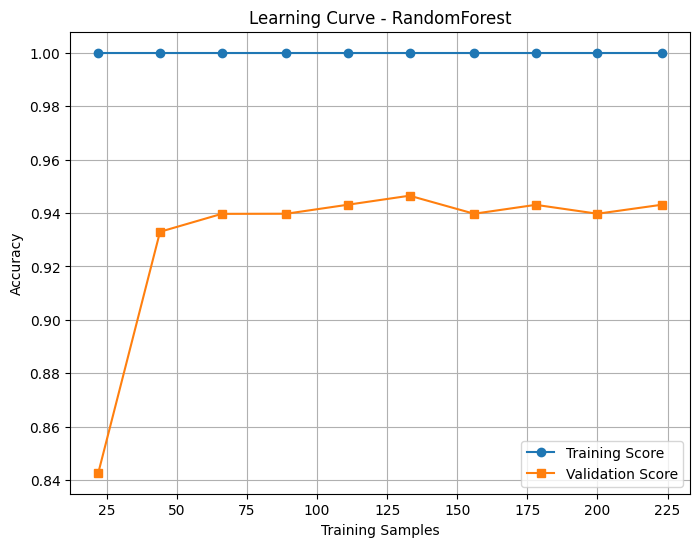

In [18]:
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)

# Prediction 

In [19]:
import pandas as pd
import numpy as np

# Load the longitudinal dataset
df_longitudinal = pd.read_csv("D:\oasis_longitudinal.csv")

# Ensure MRI ID and Gender exist in df_longitudinal
if 'MRI ID' in df_longitudinal.columns and 'M/F' in df_longitudinal.columns:
    # Rename 'M/F' to 'Gender' for consistency
    df_longitudinal.rename(columns={'M/F': 'Gender'}, inplace=True)
else:
    print("MRI ID or Gender column missing in longitudinal dataset!")

# Train Random Forest model
RandomPipeline.fit(X_train, y_train)

# Predict probabilities and class labels
y_pred_proba = RandomPipeline.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Map numeric predictions to 'Demented' and 'Nondemented'
label_mapping = {0: 'Nondemented', 1: 'Demented'}
y_pred_mapped = [label_mapping[label] for label in y_pred]
y_test_mapped = [label_mapping[label] for label in y_test]

# Merge MRI ID & Gender from longitudinal data with X_test
X_test_with_id = df_longitudinal.loc[df_longitudinal.index.isin(X_test.index), ['MRI ID', 'Gender']]

# Handle missing values if any
X_test_with_id.fillna("Unknown", inplace=True)

# Create DataFrame for displaying results
results_df = pd.DataFrame({
    'MRI ID': X_test_with_id['MRI ID'].values,
    'Gender': X_test_with_id['Gender'].values,
    'Predicted Output': y_pred_mapped,
    'Actual Output': y_test_mapped
})

# Display 5 test cases
print("Predictions using Random Forest Model:")
print(results_df.head(10))


Predictions using Random Forest Model:
          MRI ID Gender Predicted Output Actual Output
0  OAS2_0001_MR1      M         Demented      Demented
1  OAS2_0002_MR2      M      Nondemented   Nondemented
2  OAS2_0004_MR1      F         Demented      Demented
3  OAS2_0005_MR3      M      Nondemented   Nondemented
4  OAS2_0009_MR1      M      Nondemented   Nondemented
5  OAS2_0013_MR1      F         Demented      Demented
6  OAS2_0014_MR1      M         Demented      Demented
7  OAS2_0017_MR3      M      Nondemented   Nondemented
8  OAS2_0018_MR1      F      Nondemented   Nondemented
9  OAS2_0021_MR1      M         Demented      Demented


In [20]:
import joblib
joblib.dump(RandomPipeline, "alzheimer_model.pkl")


['alzheimer_model.pkl']

In [25]:
X 

,Age,SES,MMSE,CDR,eTIV,nWBV,ASF,Visit,MR Delay
0,87.0,2.0,27.0,0.0,1987.0,0.696,0.883,1.0,0.0
1,88.0,2.0,30.0,0.0,2004.0,0.681,0.876,2.0,457.0
2,75.0,1.8,23.0,0.5,1678.0,0.736,1.046,1.0,0.0
3,76.0,1.6,28.0,0.5,1738.0,0.713,1.010,2.0,560.0
4,80.0,2.6,22.0,0.5,1698.0,0.701,1.034,3.0,1895.0
...,...,...,...,...,...,...,...,...,...
368,82.0,1.0,28.0,0.5,1693.0,0.694,1.037,2.0,842.0
369,86.0,1.0,26.0,0.5,1688.0,0.675,1.040,3.0,2297.0
370,61.0,2.0,30.0,0.0,1319.0,0.801,1.331,1.0,0.0
371,63.0,2.0,30.0,0.0,1327.0,0.796,1.323,2.0,763.0
